In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(100, 100))

<Figure size 7200x7200 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

In [2]:
raw_df = pd.read_csv(filepath_or_buffer='dataWeatherForecast.csv')

In [3]:
raw_df

,Unnamed: 0,NUMBER_OF_PASSENGER,datetime,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,0,3311,2020-01-01 00:00:00,"Istanbul,Turkey",8.2,4.7,6.4,5.8,1.5,4.2,...,5.6,3,NaN,2020-01-01T08:29:11,2020-01-01T17:45:38,0.17,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"17063099999,17119099999,17061099999,1706409999..."
1,1,3316,2020-01-01 01:00:00,"Istanbul,Turkey",8.2,4.7,6.4,5.8,1.5,4.2,...,5.6,3,NaN,2020-01-01T08:29:11,2020-01-01T17:45:38,0.17,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"17063099999,17119099999,17061099999,1706409999..."
2,2,2152,2020-01-01 02:00:00,"Istanbul,Turkey",8.2,4.7,6.4,5.8,1.5,4.2,...,5.6,3,NaN,2020-01-01T08:29:11,2020-01-01T17:45:38,0.17,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"17063099999,17119099999,17061099999,1706409999..."
3,3,1390,2020-01-01 03:00:00,"Istanbul,Turkey",8.2,4.7,6.4,5.8,1.5,4.2,...,5.6,3,NaN,2020-01-01T08:29:11,2020-01-01T17:45:38,0.17,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"17063099999,17119099999,17061099999,1706409999..."
4,4,970,2020-01-01 04:00:00,"Istanbul,Turkey",8.2,4.7,6.4,5.8,1.5,4.2,...,5.6,3,NaN,2020-01-01T08:29:11,2020-01-01T17:45:38,0.17,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"17063099999,17119099999,17061099999,1706409999..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8000,8000,6086,2020-12-31 19:00:00,"Istanbul,Turkey",17.7,10.8,13.9,17.7,10.8,13.9,...,8.4,4,NaN,2020-12-31T08:29:10,2020-12-31T17:45:26,0.51,Clear,Clear conditions throughout the day.,clear-day,"17063099999,17119099999,17061099999,1706409999..."
8001,8001,3222,2020-12-31 20:00:00,"Istanbul,Turkey",17.7,10.8,13.9,17.7,10.8,13.9,...,8.4,4,NaN,2020-12-31T08:29:10,2020-12-31T17:45:26,0.51,Clear,Clear conditions throughout the day.,clear-day,"17063099999,17119099999,17061099999,1706409999..."
8002,8002,612,2020-12-31 21:00:00,"Istanbul,Turkey",17.7,10.8,13.9,17.7,10.8,13.9,...,8.4,4,NaN,2020-12-31T08:29:10,2020-12-31T17:45:26,0.51,Clear,Clear conditions throughout the day.,clear-day,"17063099999,17119099999,17061099999,1706409999..."
8003,8003,239,2020-12-31 22:00:00,"Istanbul,Turkey",17.7,10.8,13.9,17.7,10.8,13.9,...,8.4,4,NaN,2020-12-31T08:29:10,2020-12-31T17:45:26,0.51,Clear,Clear conditions throughout the day.,clear-day,"17063099999,17119099999,17061099999,1706409999..."


In [4]:
raw_df2 = pd.read_csv(filepath_or_buffer='combined_csv.csv')

In [5]:
raw_df2

,DATE_TIME,NUMBER_OF_PASSENGER
0,2020-01-01 00:00:00,3311
1,2020-01-01 01:00:00,3316
2,2020-01-01 02:00:00,2152
3,2020-01-01 03:00:00,1390
4,2020-01-01 04:00:00,970
...,...,...
8000,2020-12-31 19:00:00,6086
8001,2020-12-31 20:00:00,3222
8002,2020-12-31 21:00:00,612
8003,2020-12-31 22:00:00,239


In [6]:
raw_df['datetime'] = pd.to_datetime(raw_df['datetime'])

In [7]:
raw_df2['datetime'] = pd.to_datetime(raw_df2['DATE_TIME'])
#raw_df2['datetime'] = raw_df2['DATE_TIME']

In [8]:
raw_df2.drop('DATE_TIME', inplace=True, axis=1)

In [21]:
result = pd.merge_asof(raw_df2.sort_values('datetime'),
                 raw_df.sort_values('datetime'),
                 on='datetime',
                 direction='nearest')




In [22]:
dummie = pd.get_dummies(result["conditions"])
dummie

,Clear,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy","Snow, Rain, Partially cloudy"
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
8000,1,0,0,0,0,0
8001,1,0,0,0,0,0
8002,1,0,0,0,0,0
8003,1,0,0,0,0,0


In [23]:
result = result.drop("conditions", axis=1)

In [25]:
result = pd.concat([result, dummie], axis=1)
result.head(10)

,NUMBER_OF_PASSENGER_x,datetime,Unnamed: 0,NUMBER_OF_PASSENGER_y,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,...,moonphase,description,icon,stations,Clear,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy","Snow, Rain, Partially cloudy"
0,3311,2020-01-01 00:00:00,0,3311,"Istanbul,Turkey",8.2,4.7,6.4,5.8,1.5,...,0.17,Partly cloudy throughout the day with rain in ...,rain,"17063099999,17119099999,17061099999,1706409999...",0,0,0,0,1,0
1,3316,2020-01-01 01:00:00,1,3316,"Istanbul,Turkey",8.2,4.7,6.4,5.8,1.5,...,0.17,Partly cloudy throughout the day with rain in ...,rain,"17063099999,17119099999,17061099999,1706409999...",0,0,0,0,1,0
2,2152,2020-01-01 02:00:00,2,2152,"Istanbul,Turkey",8.2,4.7,6.4,5.8,1.5,...,0.17,Partly cloudy throughout the day with rain in ...,rain,"17063099999,17119099999,17061099999,1706409999...",0,0,0,0,1,0
3,1390,2020-01-01 03:00:00,3,1390,"Istanbul,Turkey",8.2,4.7,6.4,5.8,1.5,...,0.17,Partly cloudy throughout the day with rain in ...,rain,"17063099999,17119099999,17061099999,1706409999...",0,0,0,0,1,0
4,970,2020-01-01 04:00:00,4,970,"Istanbul,Turkey",8.2,4.7,6.4,5.8,1.5,...,0.17,Partly cloudy throughout the day with rain in ...,rain,"17063099999,17119099999,17061099999,1706409999...",0,0,0,0,1,0
5,857,2020-01-01 05:00:00,5,857,"Istanbul,Turkey",8.2,4.7,6.4,5.8,1.5,...,0.17,Partly cloudy throughout the day with rain in ...,rain,"17063099999,17119099999,17061099999,1706409999...",0,0,0,0,1,0
6,1473,2020-01-01 06:00:00,6,1473,"Istanbul,Turkey",8.2,4.7,6.4,5.8,1.5,...,0.17,Partly cloudy throughout the day with rain in ...,rain,"17063099999,17119099999,17061099999,1706409999...",0,0,0,0,1,0
7,2148,2020-01-01 07:00:00,7,2148,"Istanbul,Turkey",8.2,4.7,6.4,5.8,1.5,...,0.17,Partly cloudy throughout the day with rain in ...,rain,"17063099999,17119099999,17061099999,1706409999...",0,0,0,0,1,0
8,2412,2020-01-01 08:00:00,8,2412,"Istanbul,Turkey",8.2,4.7,6.4,5.8,1.5,...,0.17,Partly cloudy throughout the day with rain in ...,rain,"17063099999,17119099999,17061099999,1706409999...",0,0,0,0,1,0
9,2748,2020-01-01 09:00:00,9,2748,"Istanbul,Turkey",8.2,4.7,6.4,5.8,1.5,...,0.17,Partly cloudy throughout the day with rain in ...,rain,"17063099999,17119099999,17061099999,1706409999...",0,0,0,0,1,0


In [11]:
result.corr()

,NUMBER_OF_PASSENGER_x,Unnamed: 0,NUMBER_OF_PASSENGER_y,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
NUMBER_OF_PASSENGER_x,1.000000,-0.231393,1.000000,-0.164647,-0.164121,-0.166125,-0.165720,-0.168912,-0.169353,-0.155992,...,-0.049640,0.089738,0.103272,0.060398,0.083930,-0.031671,-0.030993,-0.040774,NaN,0.006976
Unnamed: 0,-0.231393,1.000000,-0.231393,0.370396,0.428410,0.408271,0.383169,0.460786,0.432308,0.445928,...,-0.125229,-0.184658,-0.067722,-0.076703,0.067834,-0.026405,-0.026901,-0.018048,NaN,-0.016018
NUMBER_OF_PASSENGER_y,1.000000,-0.231393,1.000000,-0.164647,-0.164121,-0.166125,-0.165720,-0.168912,-0.169353,-0.155992,...,-0.049640,0.089738,0.103272,0.060398,0.083930,-0.031671,-0.030993,-0.040774,NaN,0.006976
tempmax,-0.164647,0.370396,-0.164647,1.000000,0.934241,0.984047,0.993492,0.946054,0.983461,0.911823,...,-0.049132,-0.111525,-0.632373,-0.579397,0.272836,0.591001,0.590950,0.594643,NaN,0.037358
tempmin,-0.164121,0.428410,-0.164121,0.934241,1.000000,0.979453,0.933295,0.991864,0.969794,0.965465,...,0.101690,-0.230910,-0.594176,-0.352934,0.255972,0.473582,0.473759,0.464824,NaN,0.036503
temp,-0.166125,0.408271,-0.166125,0.984047,0.979453,1.000000,0.980685,0.982963,0.995563,0.953964,...,0.021984,-0.179490,-0.620554,-0.486145,0.278943,0.546281,0.546316,0.543551,NaN,0.035859
feelslikemax,-0.165720,0.383169,-0.165720,0.993492,0.933295,0.980685,1.000000,0.947283,0.986799,0.919702,...,-0.056416,-0.122717,-0.636603,-0.581444,0.281243,0.582186,0.582001,0.590947,NaN,0.017246
feelslikemin,-0.168912,0.460786,-0.168912,0.946054,0.991864,0.982963,0.947283,1.000000,0.982395,0.962936,...,0.033069,-0.194133,-0.596878,-0.392759,0.262583,0.473932,0.474038,0.470472,NaN,0.035759
feelslike,-0.169353,0.432308,-0.169353,0.983461,0.969794,0.995563,0.986799,0.982395,1.000000,0.949974,...,-0.021002,-0.160663,-0.623615,-0.506996,0.285542,0.539310,0.539210,0.542238,NaN,0.028190
dew,-0.155992,0.445928,-0.155992,0.911823,0.965465,0.953964,0.919702,0.962936,0.949974,1.000000,...,0.061425,-0.227243,-0.606586,-0.329412,0.164892,0.427530,0.427487,0.423363,NaN,0.017819


In [12]:
corrMatrix = result.corr()

<AxesSubplot:>

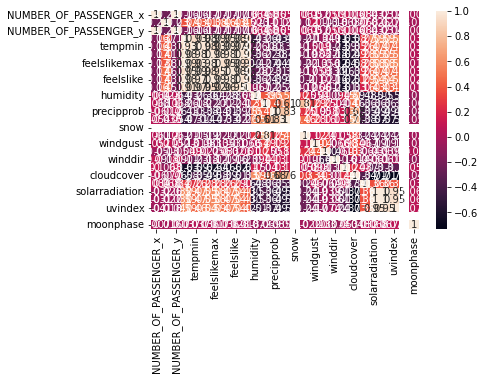

In [13]:
sn.heatmap(corrMatrix, annot=True)

In [14]:
plt.show()